## Predicción de Éxito en Campañas de Crowdfunding
Formas parte del equipo de analítica en una plataforma de **crowdfunding** donde emprendedores publican campañas para recaudar fondos. Tu equipo quiere desarrollar un modelo de Machine Learning para predecir si una campaña será exitosa (es decir, si alcanzará su objetivo de recaudación).

**El objetivo de negocio es priorizar qué campañas mostrar en el homepage para maximizar la tasa de campañas exitosas.** Como sólo pueden destacar 10 campañas en la homepage, se plantea que es preferible evitar destacar campañas que terminen fracasando, aunque eso signifique eventualmente dejar de mostrar algunas que sí hubieran resultado exitosas.

## ¿Qué debes hacer?
1- Realizar un breve análisis exploratorio del dataset (gráfico y analítico) y comentar tus conclusiones al respecto.

2- Realizar la limpieza del dataset que consideres necesaria y crear un pipeline para preprocesar correctamente los datos (valores nulos, outliers, codificación, escalado, etc.).

3- Entrenar al menos 3 modelos de clasificación optimizando hiperparámetros y buscando maximizar la métrica que consideres adecuada.

4- Reportar métricas de performance (recall, precisión, accuracy, AUC y matriz de confusión) para cada uno de estos modelos y seleccionar el mejor modelo bajo tu criterio.

5- Justificar y comentar todas tus decisiones y el código que utilices.




In [255]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Dataset: https://drive.google.com/file/d/1IKYaGCLijRIdTu00Vum21E21jMP__GrU/view?usp=sharing

**Features:**

- goal_amount: Monto total (en USD) que la campaña busca recaudar.

- duration_days: Cantidad de días que durará la campaña una vez lanzada.

- num_rewards: Número de recompensas ofrecidas a los patrocinadores (por ejemplo, productos, descuentos, agradecimientos).

- has_video: 1 si la campaña incluye un video de presentación, 0 si no.

- num_images: Cantidad de imágenes incluidas en la campaña.

- campaign_category: Categoría temática de la campaña.

- launch_day: Día de la semana en que se lanza la campaña.

- founder_previous_successes: Número de campañas exitosas previas del fundador en la misma plataforma.

- founder_followers: Número de seguidores que tiene el fundador en la plataforma.

**Target:**
- success: Toma el valor 1 si la campaña alcanzó su meta de recaudación, 0 si no.

In [256]:
df_camp = pd.read_csv("/Users/lolonastri/Desktop/IA_UCEMA/parciales/primer_parcial_IA/data/crowdfunding_dataset.csv")
df_camp

,goal_amount,duration_days,num_rewards,has_video,num_images,campaign_category,launch_day,founder_previous_successes,founder_followers,success
0,18795.0,15,1,1,NaN,art,Friday,1,NaN,1
1,3860.0,30,4,1,0.0,games,Friday,1,2112.0,1
2,79820.0,30,2,1,NaN,technology,Thursday,1,267.0,0
3,57886.0,15,2,1,4.0,design,Thursday,0,2134.0,0
4,9265.0,30,4,1,3.0,music,Wednesday,1,4252.0,1
...,...,...,...,...,...,...,...,...,...,...
6495,80606.0,15,5,0,3.0,fashion,Friday,1,2702.0,1
6496,3924.0,60,6,0,1.0,fashion,Sunday,1,1639.0,1
6497,54322.0,15,2,0,3.0,fashion,Tuesday,2,860.0,0
6498,29478.0,45,4,1,3.0,games,Monday,1,1717.0,0


---

## **Parte 1: Comprensión y Preparación de Datos**

### → Validación de la data

In [257]:
print("El dataset tiene" , df_camp.shape[0], "filas y", df_camp.shape[1], "columnas")

El dataset tiene 6500 filas y 10 columnas


In [258]:
df_camp.columns

Index(['goal_amount', 'duration_days', 'num_rewards', 'has_video',
       'num_images', 'campaign_category', 'launch_day',
       'founder_previous_successes', 'founder_followers', 'success'],
      dtype='object')

In [259]:
from funciones.funciones import validate_columns
validate_columns(df_camp)

,Unique_Values,Num_Unique_Values,Num_Null_Values,%_Null_Values,Sample_Unique_Values
goal_amount,NaN,6156.0,344,5.292308,"[20625.0, 62494.0, 65956.0, 70563.0, 99907.0]"
duration_days,NaN,6500.0,0,0.000000,"[45, 60, 30, 60, 15]"
num_rewards,NaN,6500.0,0,0.000000,"[5, 5, 5, 1, 2]"
has_video,NaN,6500.0,0,0.000000,"[1, 1, 0, 1, 1]"
num_images,NaN,5831.0,669,10.292308,"[4.0, 2.0, 3.0, 1.0, 3.0]"
campaign_category,9,6500,0,0.000000,"[comics, misc, food, misc, music]"
launch_day,7,6500,0,0.000000,"[Monday, Monday, Thursday, Monday, Monday]"
founder_previous_successes,NaN,6500.0,0,0.000000,"[0, 1, 2, 0, 3]"
founder_followers,NaN,6028.0,472,7.261538,"[434.0, 4351.0, nan, 1647.0, 2972.0]"
success,NaN,6500.0,0,0.000000,"[0, 1, 0, 0, 1]"


In [260]:
df_camp.describe()

,goal_amount,duration_days,num_rewards,has_video,num_images,founder_previous_successes,founder_followers,success
count,6156.000000,6500.000000,6500.000000,6500.000000,5831.000000,6500.000000,6028.000000,6500.000000
mean,51323.209877,32.776154,3.513538,0.643538,2.497513,1.477846,1794.113968,0.389538
std,28270.931442,12.974517,1.871540,0.478991,1.584970,1.217140,1787.222902,0.487683
min,3055.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26854.750000,30.000000,2.000000,0.000000,1.000000,1.000000,516.750000,0.000000
50%,50895.000000,30.000000,3.000000,1.000000,2.000000,1.000000,1266.000000,0.000000
75%,76347.250000,45.000000,5.000000,1.000000,3.000000,2.000000,2488.250000,1.000000
max,99999.000000,60.000000,12.000000,1.000000,10.000000,7.000000,16010.000000,1.000000


---

### →  Veo los tipos de datos con dtypes

In [261]:
df_camp.dtypes

goal_amount                   float64
duration_days                   int64
num_rewards                     int64
has_video                       int64
num_images                    float64
campaign_category              object
launch_day                     object
founder_previous_successes      int64
founder_followers             float64
success                         int64
dtype: object

In [262]:
df_camp['success'].value_counts().sort_index() 

success
0    3968
1    2532
Name: count, dtype: int64

In [263]:
for col in df_camp.columns:
    print(f"Value counts for {col}:")
    print(df_camp[col].value_counts())
    print("\n")

Value counts for goal_amount:
goal_amount
67925.0    3
49163.0    3
6748.0     3
23884.0    2
94748.0    2
          ..
95059.0    1
38631.0    1
9471.0     1
25612.0    1
74042.0    1
Name: count, Length: 5969, dtype: int64


Value counts for duration_days:
duration_days
30    3311
15    1309
45    1248
60     632
Name: count, dtype: int64


Value counts for num_rewards:
num_rewards
3     1376
4     1280
2     1175
5      858
1      699
6      497
7      244
0      188
8      117
9       44
10      15
11       5
12       2
Name: count, dtype: int64


Value counts for has_video:
has_video
1    4183
0    2317
Name: count, dtype: int64


Value counts for num_images:
num_images
2.0     1481
3.0     1267
1.0     1194
4.0      776
0.0      487
5.0      376
6.0      165
7.0       57
8.0       20
9.0        7
10.0       1
Name: count, dtype: int64


Value counts for campaign_category:
campaign_category
technology    1145
art            928
food           873
games          676
design         

---

### → Valores outliers

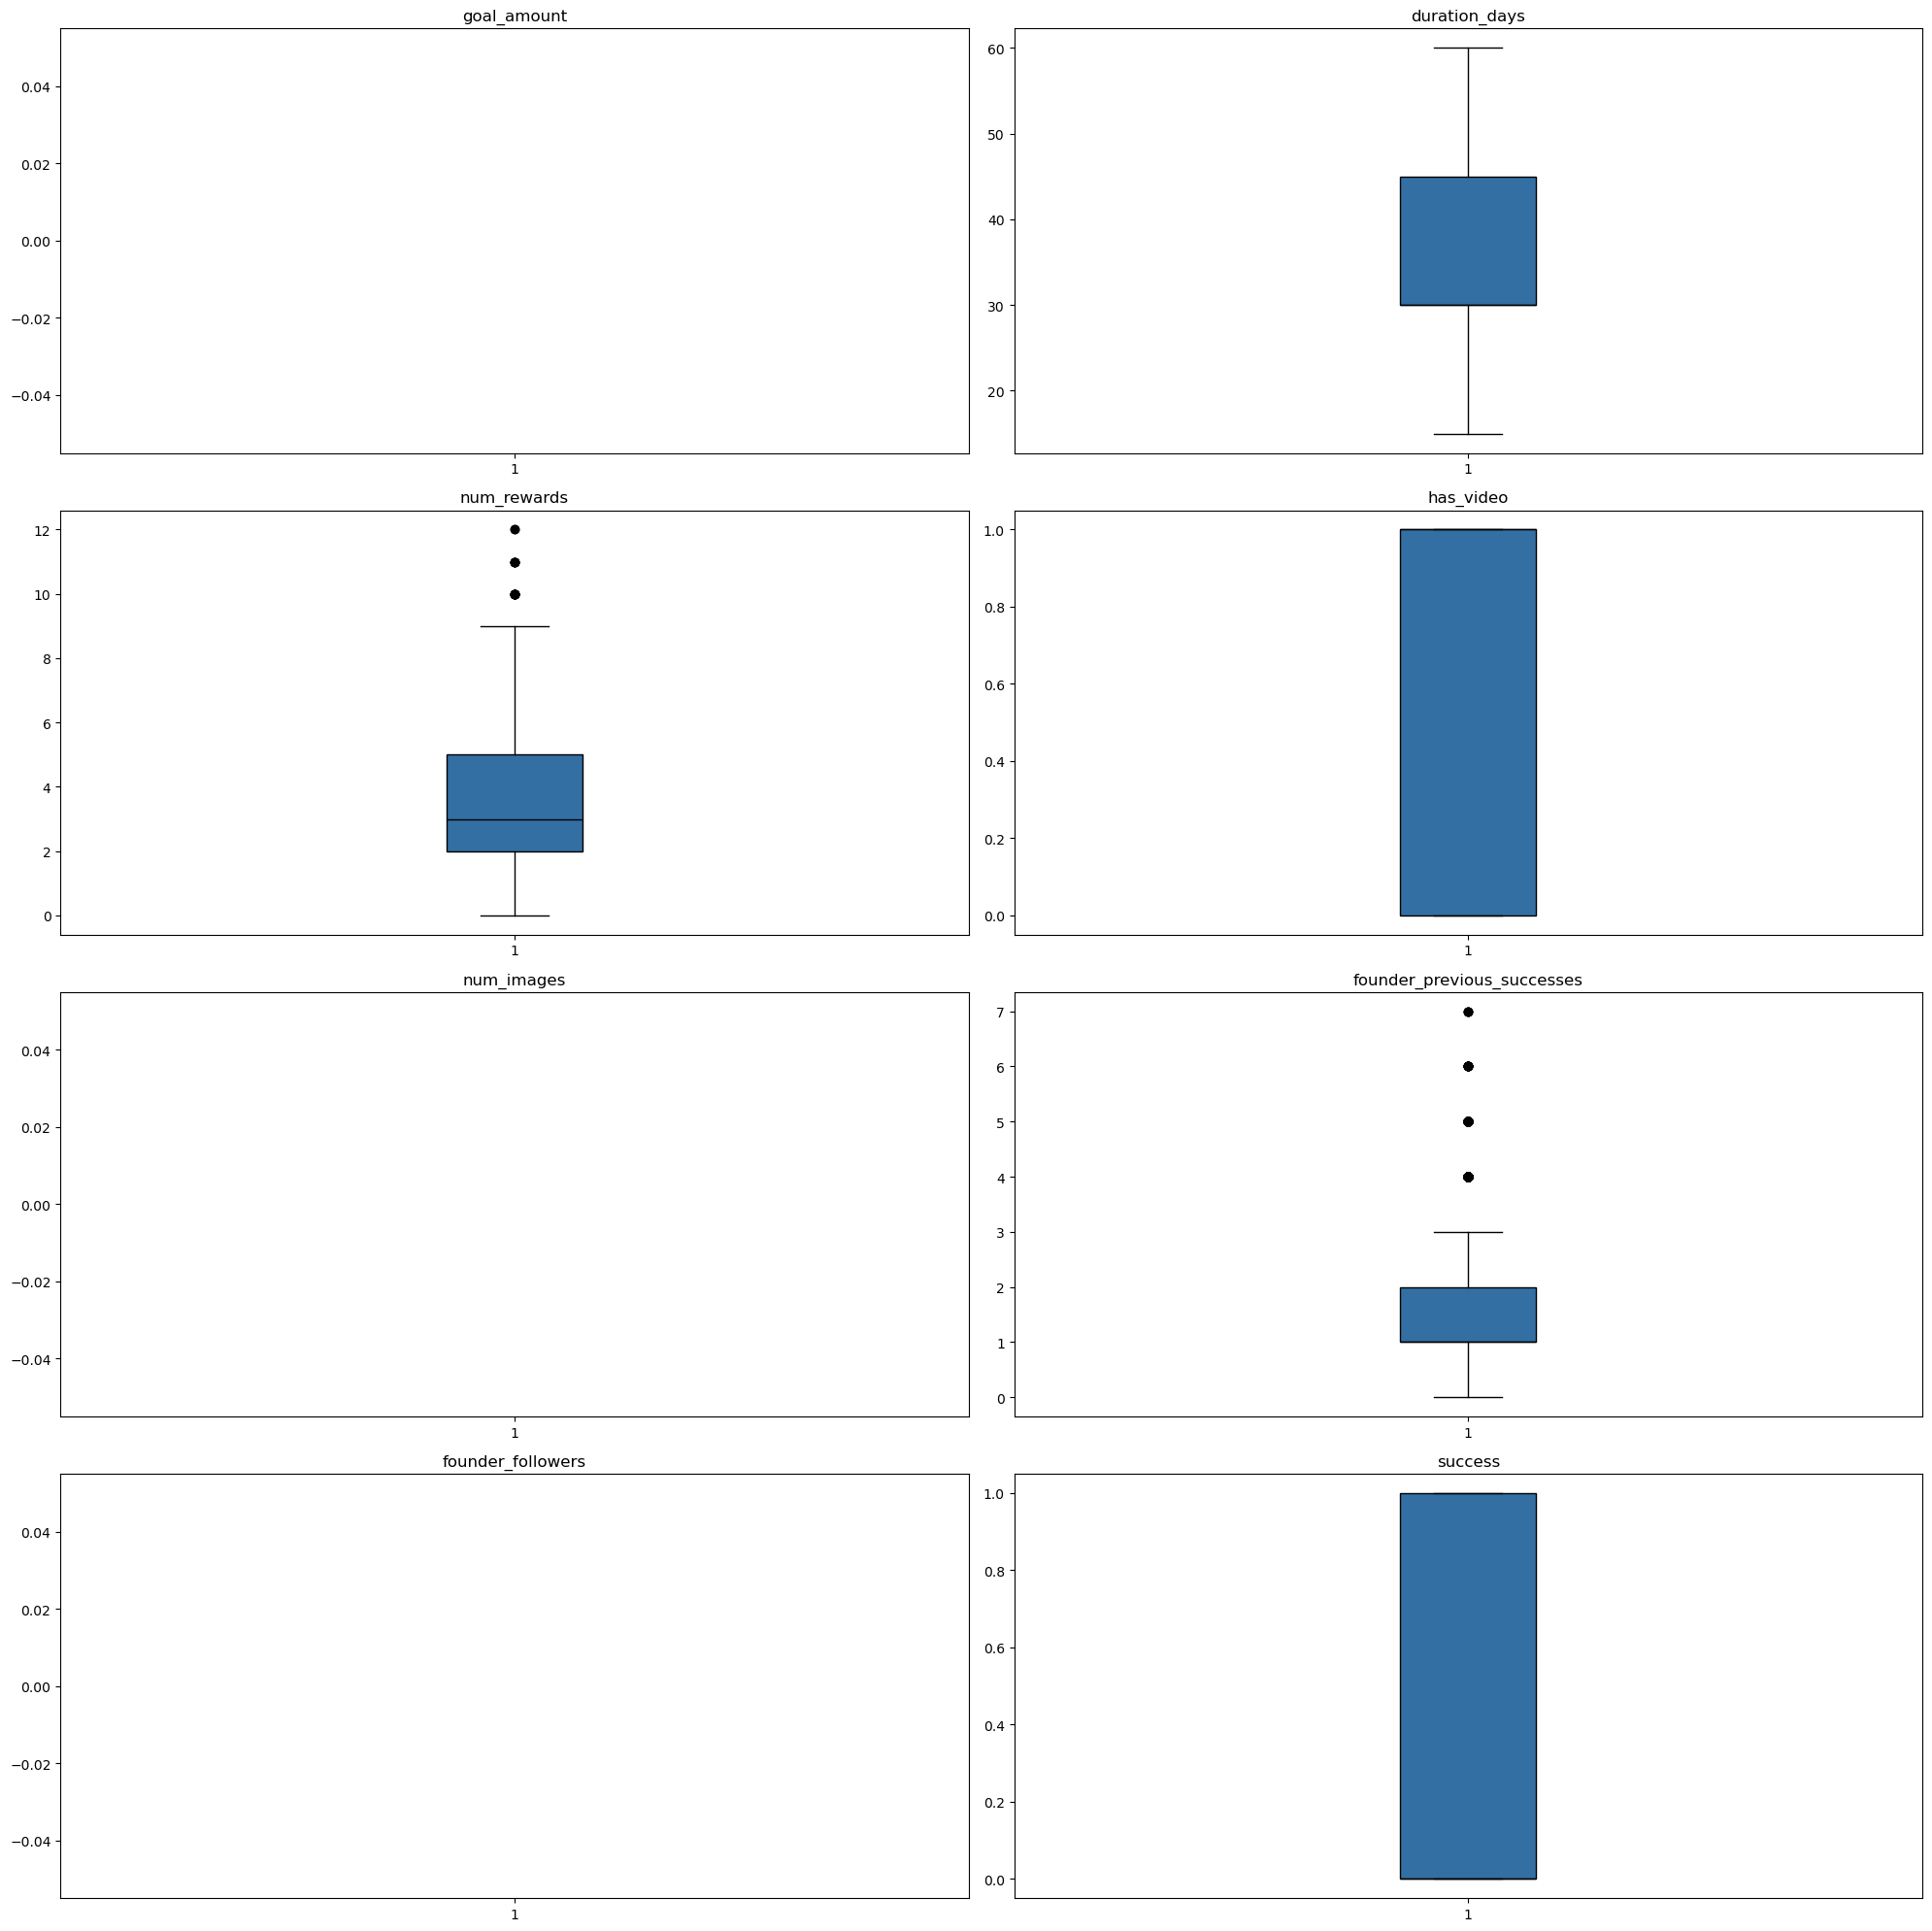

In [264]:
from funciones.funciones import plot_outliers
plot_outliers(df_camp)

#### Para este dataset he tomado la decision de no remover outliers debido a que no veo ninguna inconsistencia en los datos.

---

## **Parte 2: Análisis Exploratorio de Datos**


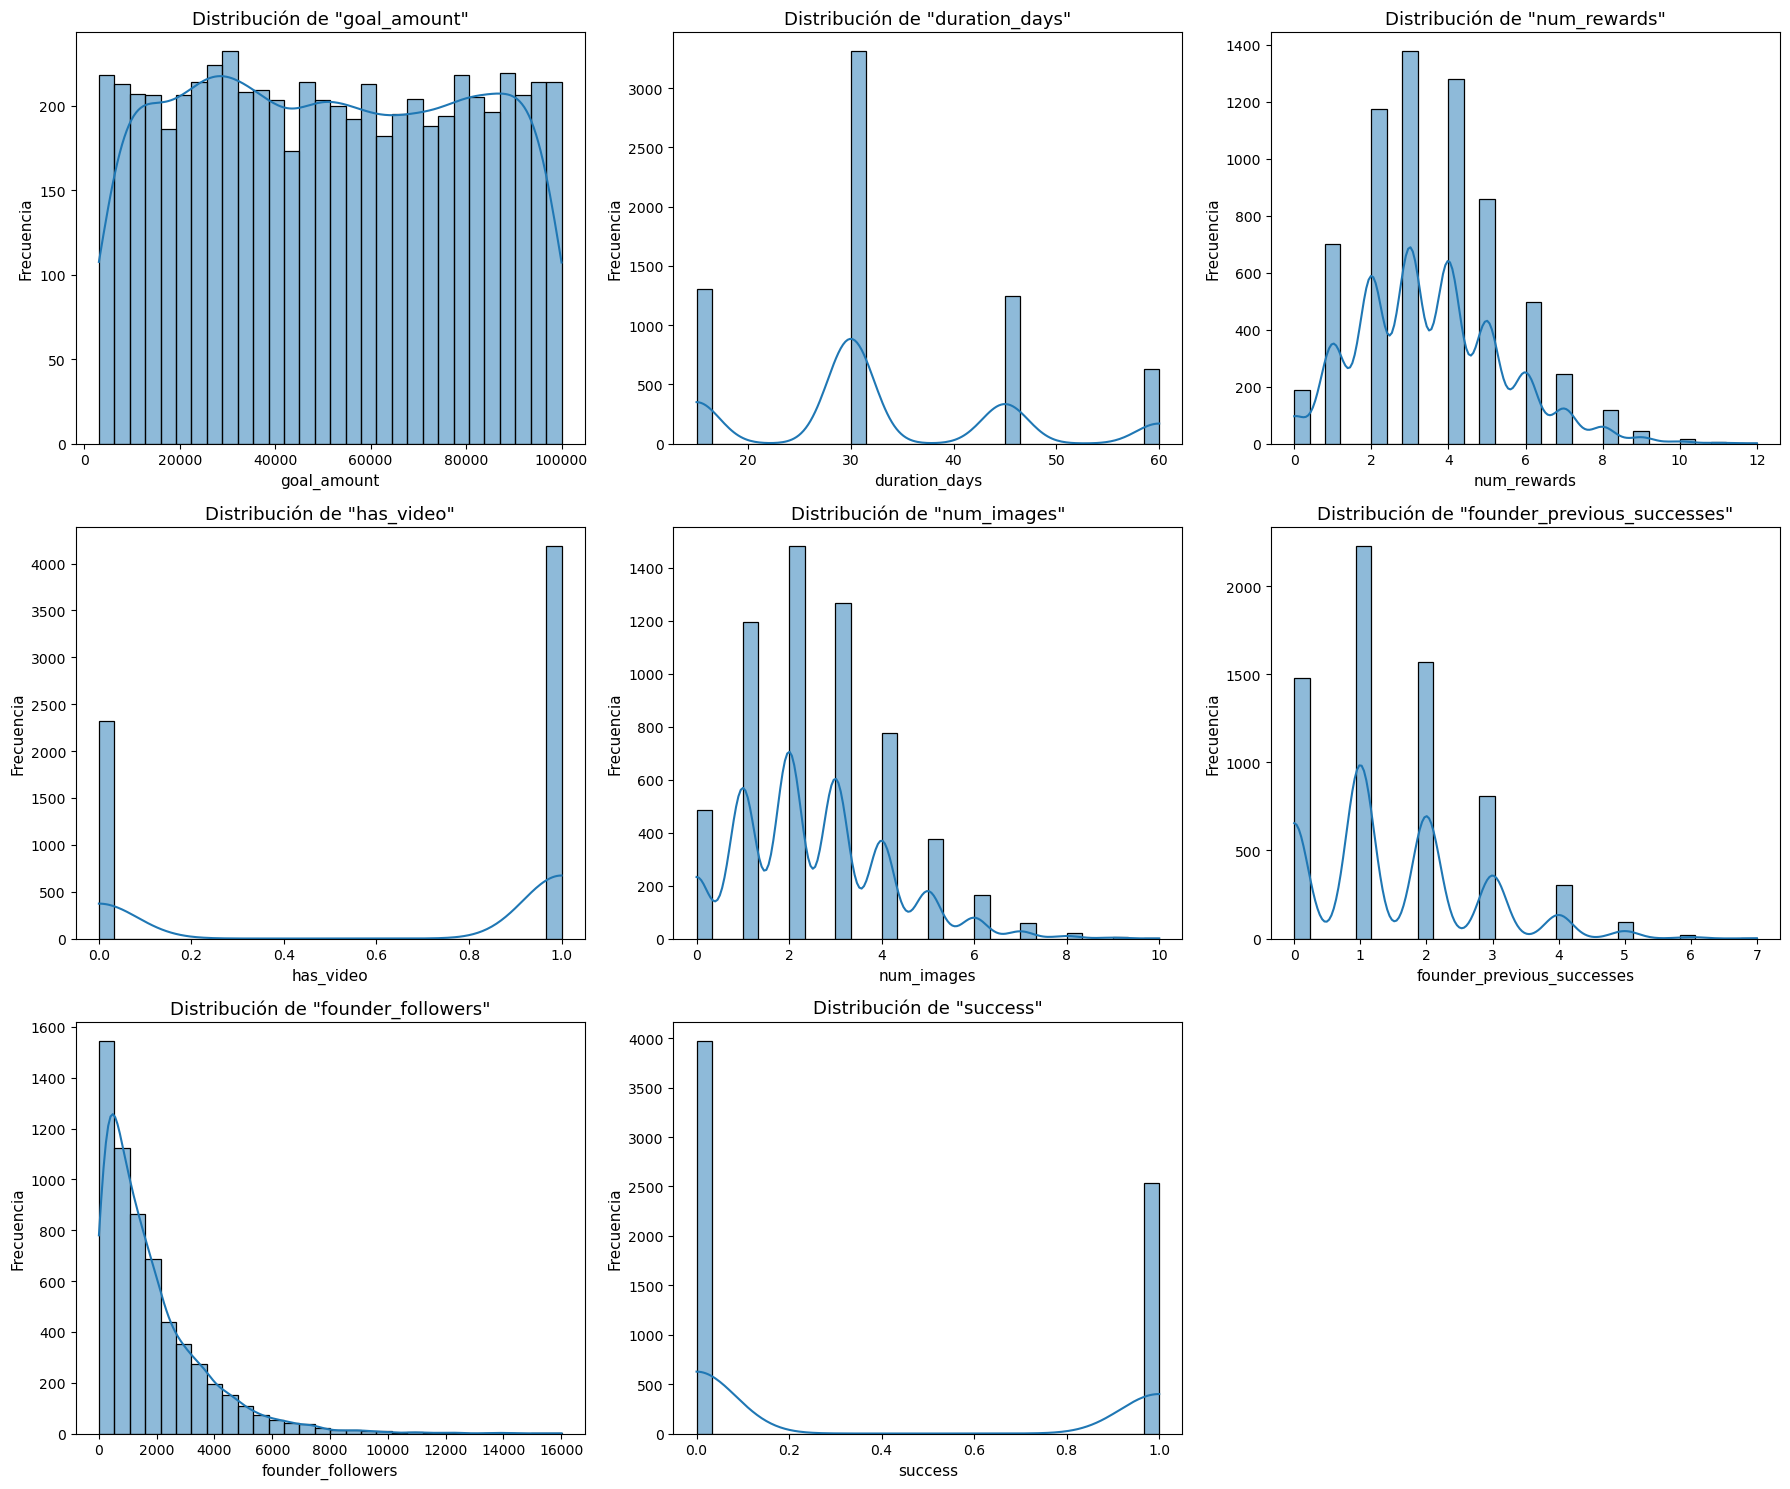

In [265]:
import math
numerical_vars = df_camp.select_dtypes(include=['int64', 'float64']).columns

# Cantidad de gráficos y configuración de grilla
num_vars = len(numerical_vars)
cols = 3
rows = math.ceil(num_vars / cols)

# Crear figura y ejes
fig, axes = plt.subplots(rows, cols, figsize=(18, 5 * rows))
axes = axes.flatten()  # Aplanar la grilla para recorrer fácilmente

# Generar cada histograma
for i, col in enumerate(numerical_vars):
    sns.histplot(df_camp[col], kde=True, bins=30, edgecolor='black', ax=axes[i])
    axes[i].set_title(f'Distribución de "{col}"', fontsize=13)
    axes[i].set_xlabel(col, fontsize=11)
    axes[i].set_ylabel("Frecuencia", fontsize=11)

# Eliminar ejes vacíos si sobran
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## 📊 Conclusiones sobre la distribución de variables del dataset de campañas de crowdfunding

### 🎯 `goal_amount` (Monto objetivo de recaudación)
- Distribución **aproximadamente uniforme**. Voy a tener que considerar aplicar escalado dentro de mi Pipeline para facilitar el aprendizaje del modelo.

### 📆 `duration_days` (Duración de la campaña)
- Distribución con picos en duraciones comunes como **30 y 60 días**.

### 🎁 `num_rewards` (Cantidad de recompensas ofrecidas)
- Distribución concentrada en valores bajos (entre 0 y 5).
- Pocos casos con más de 10 recompensas, que podrían representar campañas complejas o mal estructuradas.

### 🎥 `has_video` (¿Tiene video?)
- Variable binaria con distribución **desbalanceada**: la mayoría de las campañas **sí incluyen un video**.
- Puede ser un fuerte predictor de éxito.

### 🖼️ `num_images` (Cantidad de imágenes)
- Distribución **asimétrica**, con mayor frecuencia en campañas con entre 1 y 5 imágenes.
- Campañas sin imágenes o con muchas imágenes son minoría y podrían ser casos extremos.

### 🧑‍💼 `founder_previous_successes` (Éxitos anteriores del fundador)
- Distribución **muy sesgada**, donde la mayoría tiene **0 o 1 éxito previo**.
- Puede representar experiencia acumulada y ser un fuerte predictor.

### 👥 `founder_followers` (Cantidad de seguidores del fundador)
- Distribución **fuertemente sesgada**, con la mayoría de los fundadores teniendo pocos seguidores.

### ✅ `success` (Variable objetivo: ¿Fue exitosa la campaña?)
- Distribución **desbalanceada**, con mayoría de campañas exitosas (~60-70%).


### → Análisis de sesgos por días.

In [266]:
dias = sorted(df_camp['duration_days'].unique())
print(dias)

[15, 30, 45, 60]


In [267]:
# Creo una funcion para clasificar la duración de campaña
def clasificar_duracion(dias):
    if dias <= 20:
        return "corta"
    elif 21 <= dias <= 40:
        return "media"
    else:
        return "larga"

df_camp["tipo_duracion"] = df_camp["duration_days"].apply(clasificar_duracion)

In [268]:
exito_por_duracion = df_camp.groupby("tipo_duracion").agg({"success": "count"}).reset_index()
exito_por_duracion

,tipo_duracion,success
0,corta,1309
1,larga,1880
2,media,3311


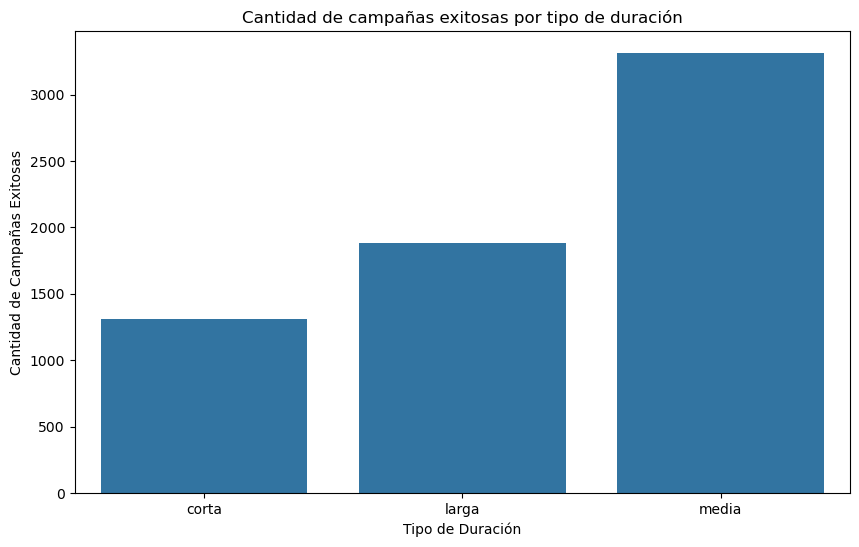

In [269]:
plt.figure(figsize=(10,6))
sns.barplot(data=exito_por_duracion, x="tipo_duracion", y="success")
plt.title("Cantidad de campañas exitosas por tipo de duración")
plt.xlabel("Tipo de Duración")
plt.ylabel("Cantidad de Campañas Exitosas")
plt.show()

El gráfico muestra la **cantidad total de campañas exitosas** agrupadas por tipo de duración: **corta**, **media** y **larga**. A partir de esta visualización, se pueden destacar las siguientes conclusiones:
- 📈 **Duración Media** (21 a 40 días) es la categoría con **mayor cantidad de campañas exitosas**, superando las 3.200. Esto sugiere que es la opción más favorable para alcanzar el objetivo de recaudación.

- 🕰️ **Duración Larga** (> 40 días) presenta un volumen moderado de campañas exitosas, pero **significativamente menor** que la duración media. Esto puede indicar pérdida de tracción o disminución del interés a lo largo del tiempo.

- ⏱️ **Duración Corta** (≤ 20 días) es la categoría con **menor cantidad de campañas exitosas**. Esto refuerza la hipótesis de que una duración muy limitada **no permite alcanzar visibilidad suficiente ni completar el ciclo de recaudación**.


### → Variable target

In [270]:
si_success = df_camp[df_camp['success'] == 1]
no_success = df_camp[df_camp['success'] == 0]

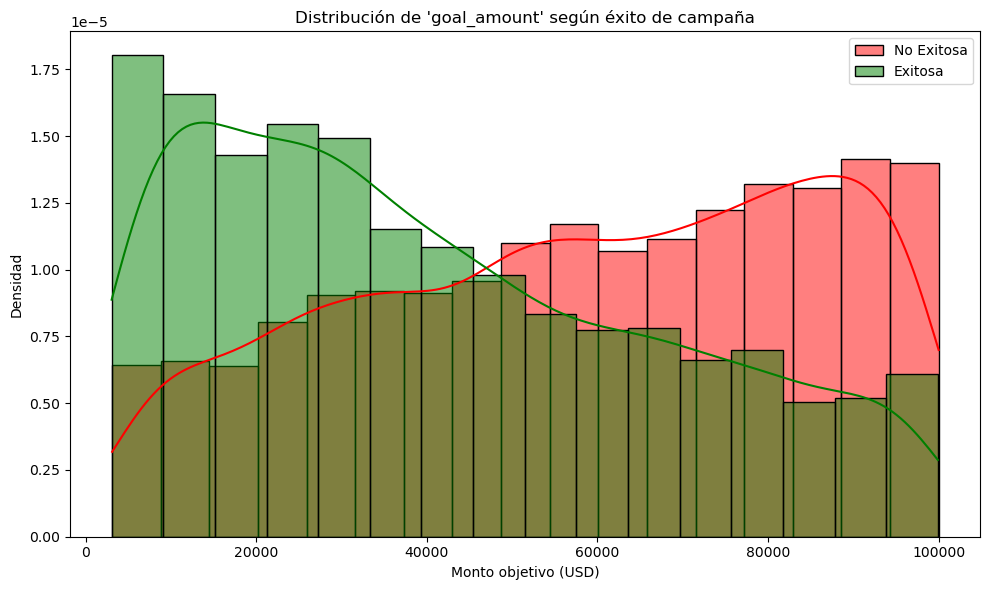

In [271]:
plt.figure(figsize=(10, 6))
sns.histplot(no_success["goal_amount"], label="No Exitosa", color="red", kde=True, stat="density")
sns.histplot(si_success["goal_amount"], label="Exitosa", color="green", kde=True, stat="density")

plt.title("Distribución de 'goal_amount' según éxito de campaña")
plt.xlabel("Monto objetivo (USD)")
plt.ylabel("Densidad")
plt.legend()
plt.tight_layout()
plt.show()


## 🎯 Distribución del Monto Objetivo (`goal_amount`) según Éxito de Campaña

La gráfica muestra la distribución del **monto objetivo de recaudación en USD**, diferenciando entre campañas que **no fueron exitosas** (rojo) y aquellas que **sí lo fueron** (verde).

### 🔍 Conclusiones:

- Las **campañas exitosas** tienden a fijar montos **más bajos** como objetivo, con una mayor densidad concentrada por debajo de los **40.000 USD**. Esto sugiere que establecer objetivos moderados puede llegar a aumentar la probabilidad de éxito.

- Por el contrario, las **campañas no exitosas** son más frecuentes a medida que el objetivo se incrementa, especialmente a partir de los **60.000 USD**. Esto indica que cuanto más ambicioso es el monto, menor es la probabilidad de alcanzar el objetivo.


### `Distribución general de la variable target`

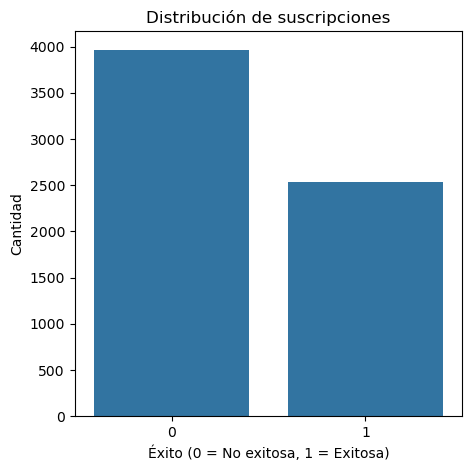

In [272]:
plt.figure(figsize=(5, 5))
sns.countplot(data=df_camp, x='success')
plt.title("Distribución de suscripciones")
plt.xlabel("Éxito (0 = No exitosa, 1 = Exitosa)")
plt.ylabel("Cantidad")
plt.show()


### `Análisis por variables categóricas`

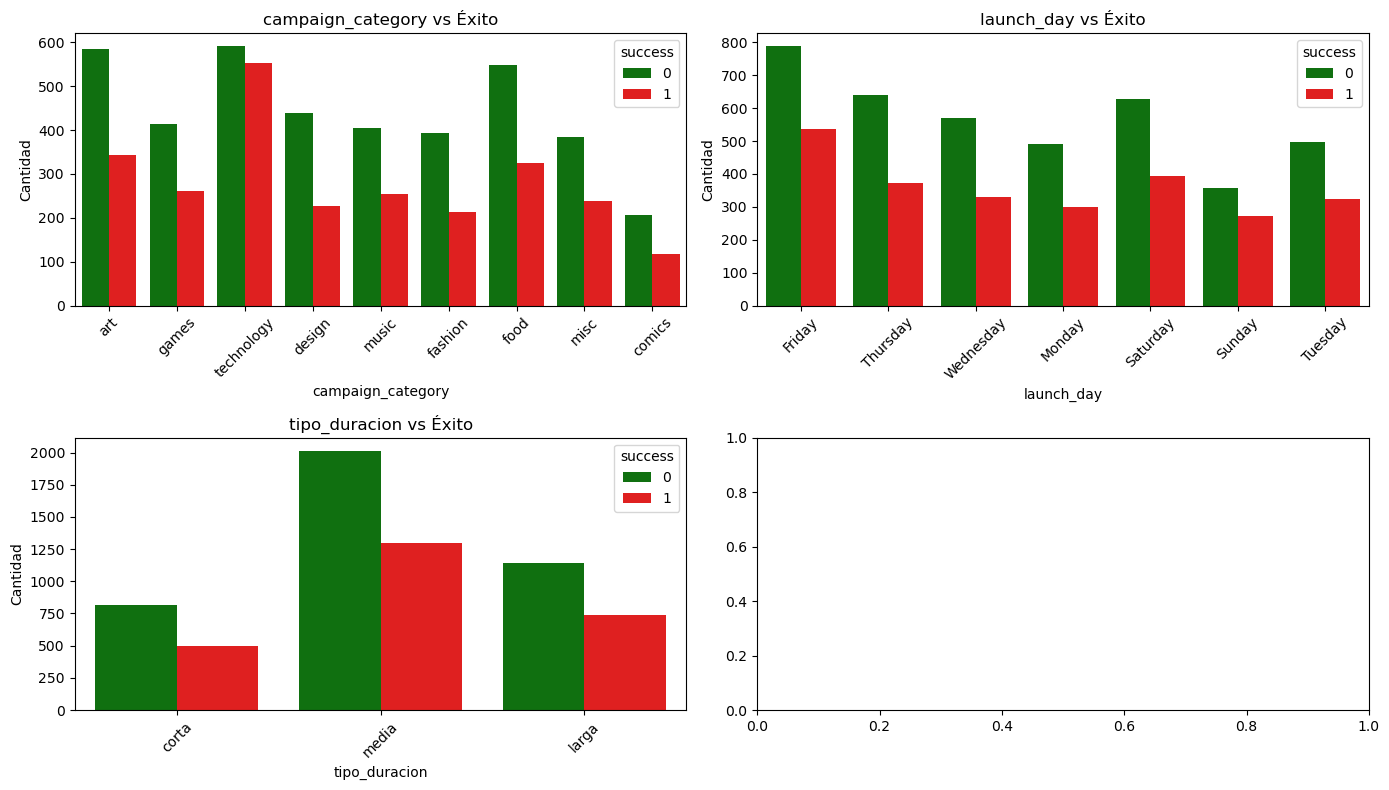

In [273]:
import math

categoricas = df_camp.select_dtypes(exclude=[np.number]).columns.tolist()

categoricas = categoricas

fig, axs = plt.subplots(math.ceil(len(categoricas)/2), 2, figsize=(14, 4 * math.ceil(len(categoricas)/2)))
axs = axs.flatten()

custom_palette = {1: 'Red', 0: 'Green'}

for i, col in enumerate(categoricas):
    sns.countplot(data=df_camp, x=col, hue='success', palette=custom_palette, ax=axs[i])
    axs[i].set_title(f'{col} vs Éxito')
    axs[i].tick_params(axis='x', rotation=45)
    axs[i].set_ylabel("Cantidad")

plt.tight_layout()
plt.show()


## 📌 Conclusión

Con base en el análisis realizado, las **campañas que sí fueron exitosas** tienden a compartir ciertas características que las distinguen de las **no exitosas**. 

| **Columna (Característica)**     | **Tendencia en campañas exitosas**                                           |
|----------------------------------|------------------------------------------------------------------------------|
| 🎨 `campaign_category`           | Mayor éxito en categorías como **art, technology y food**                   |
| 📅 `launch_day`                  | Las campañas lanzadas un **viernes o sábado** tienen mayor tasa de éxito    |
| ⏳ `tipo_duracion`               | Las campañas de **duración media (21-40 días)** muestran mejor desempeño    |

Estas observaciones sugieren que la probabilidad de que una campaña alcance su objetivo de recaudación está influenciada tanto por **cuándo se lanza**, **cuánto dura**, como por la **categoría temática**. Esta información es clave para:
- **Optimizar las recomendaciones de campañas en la homepage**, priorizando las de mayor probabilidad de éxito.
- **Asesorar a emprendedores** sobre cómo estructurar y calendarizar sus campañas para maximizar el rendimiento.


---

## **Parte 3: Preparación de Datos para Modelado**


### → Selección de Características. Decido qué variables incluir en el modelo. Considero excluir variables con sesgos introducidos artificialmente para evaluar su impacto en el rendimiento del modelo.

In [274]:
df_camp.select_dtypes(include=['object']).columns

Index(['campaign_category', 'launch_day', 'tipo_duracion'], dtype='object')

In [275]:
df_camp = df_camp.drop(['tipo_duracion'], axis=1)

In [276]:
categoricas = ['campaign_category', 'launch_day']
df_camp = pd.get_dummies(df_camp, columns=categoricas)

In [277]:
df_camp = df_camp.replace({True: 1, False: 0})

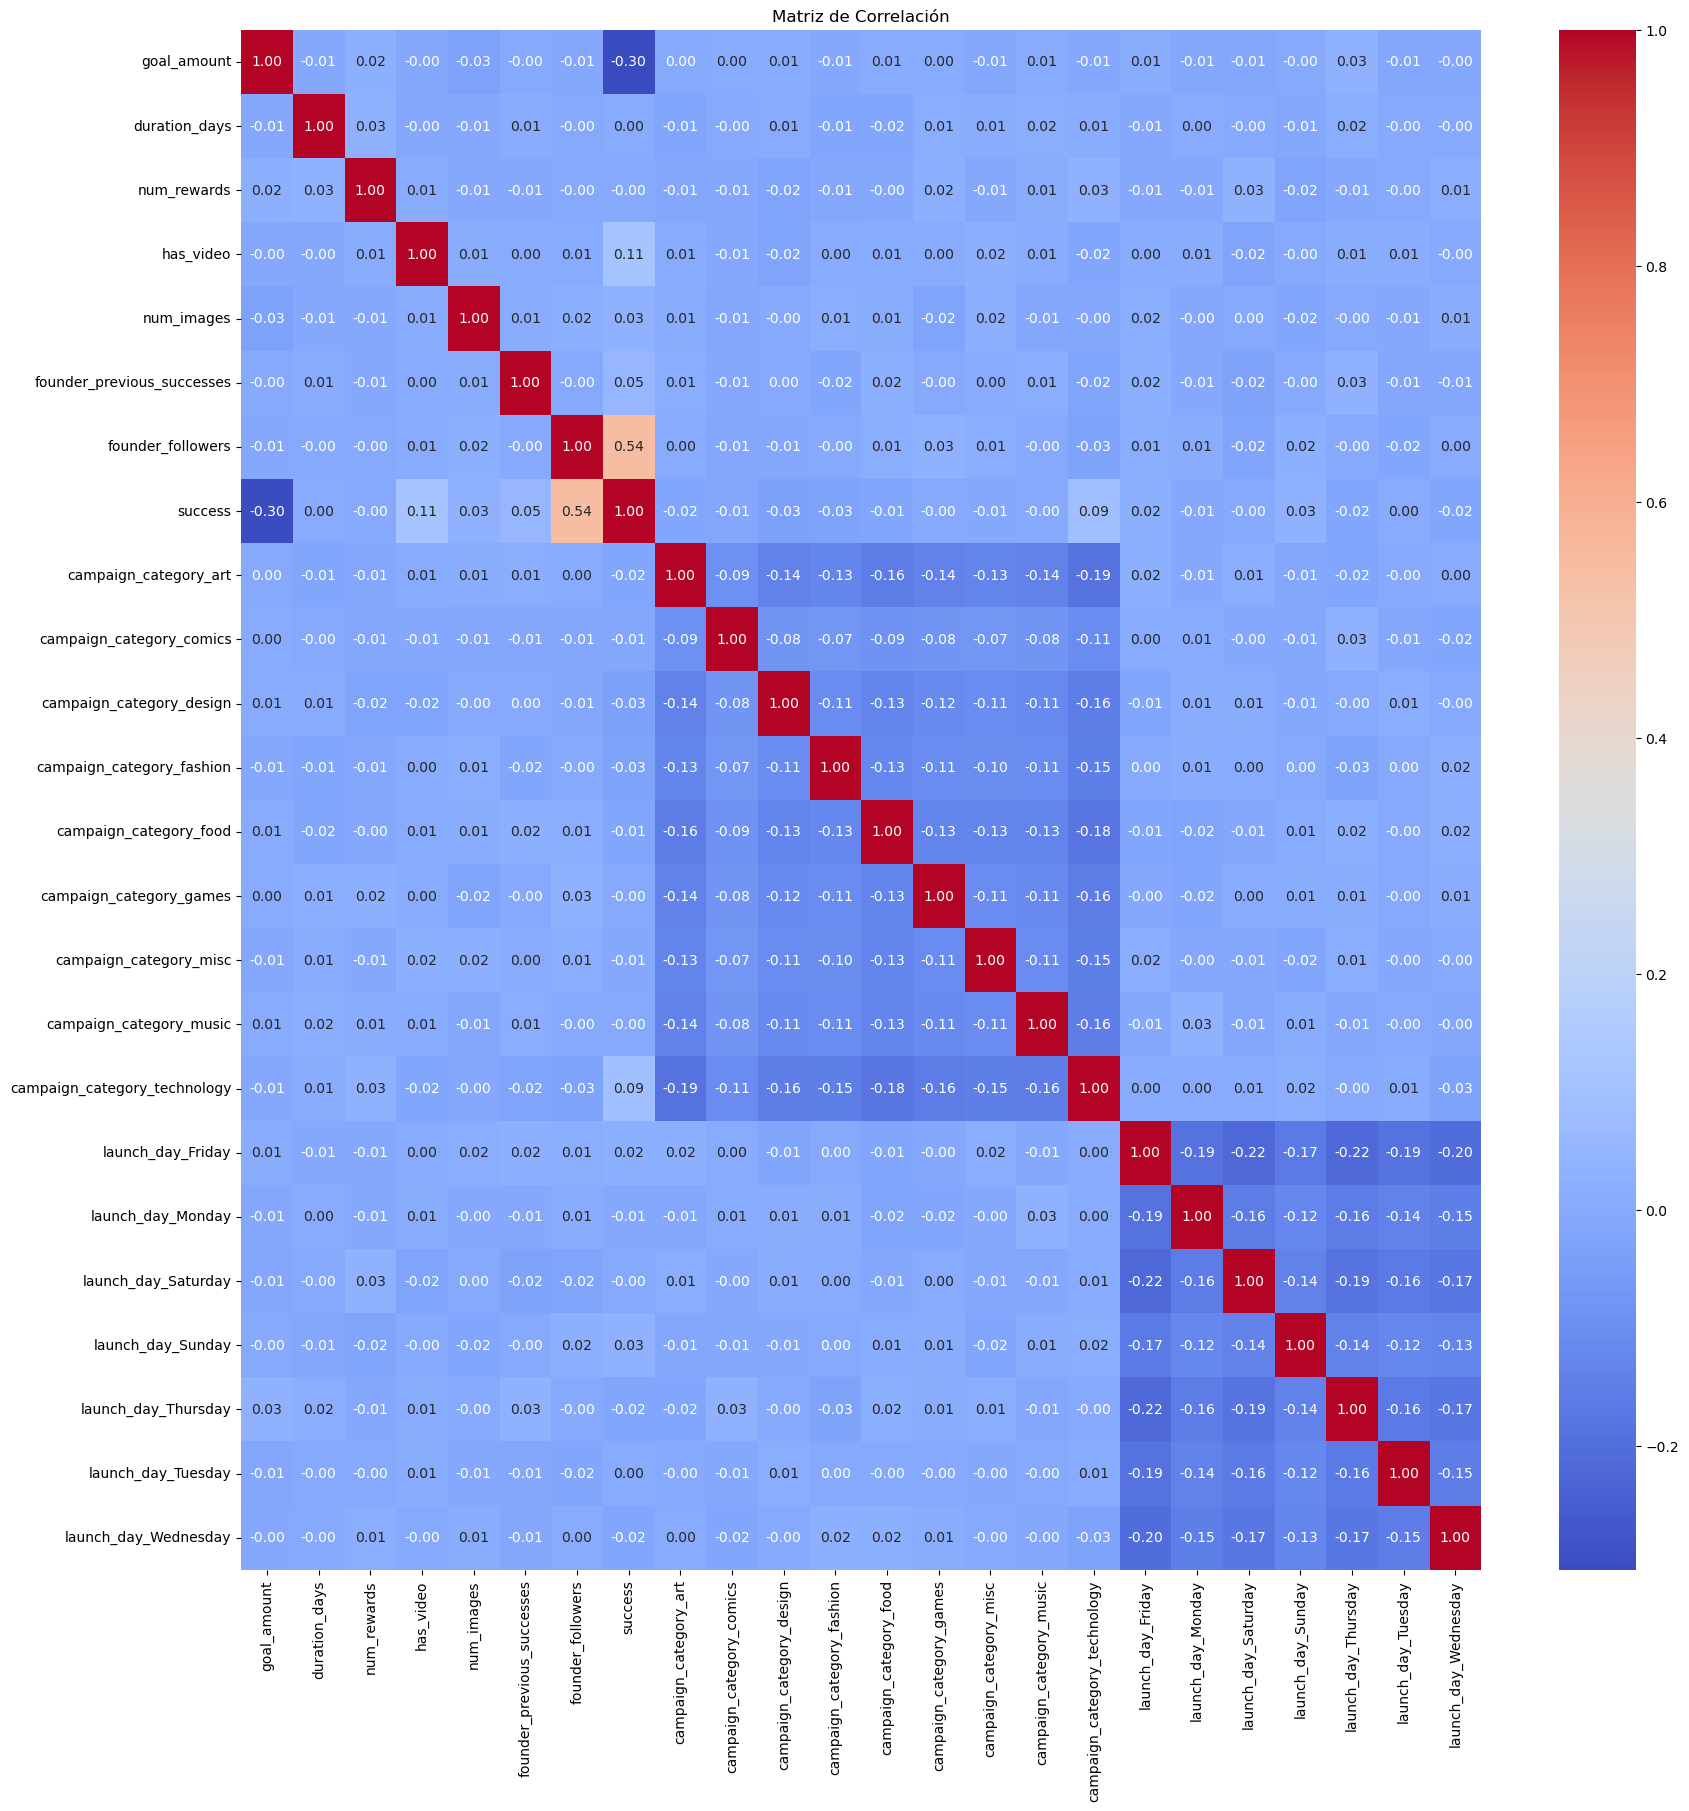

In [278]:
plt.figure(figsize=(20, 20))
sns.heatmap(df_camp.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriz de Correlación")
plt.show()

In [279]:
df_camp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6500 entries, 0 to 6499
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   goal_amount                   6156 non-null   float64
 1   duration_days                 6500 non-null   int64  
 2   num_rewards                   6500 non-null   int64  
 3   has_video                     6500 non-null   int64  
 4   num_images                    5831 non-null   float64
 5   founder_previous_successes    6500 non-null   int64  
 6   founder_followers             6028 non-null   float64
 7   success                       6500 non-null   int64  
 8   campaign_category_art         6500 non-null   int64  
 9   campaign_category_comics      6500 non-null   int64  
 10  campaign_category_design      6500 non-null   int64  
 11  campaign_category_fashion     6500 non-null   int64  
 12  campaign_category_food        6500 non-null   int64  
 13  cam

---

## **Parte 4: Modelado**


In [280]:
# Separo mi df en X e Y
X = df_camp.drop(['success'], axis=1)
y = df_camp['success']

# Separo en train y test con 0.2 en test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify = y
)

##### ¿Está balanceado mi dataset?

In [281]:
# Contar la cantidad de valores de cada clase
counts = y.value_counts()

# Calcular la proporción de cada clase
prop = counts / counts.sum()

# Imprimir los resultados
print("Número de muestras por clase:\n", counts)
print("\nProporción de muestras por clase:\n", prop)


Número de muestras por clase:
 success
0    3968
1    2532
Name: count, dtype: int64

Proporción de muestras por clase:
 success
0    0.610462
1    0.389538
Name: count, dtype: float64


##### Sí. Claramente este dataset esta desbalanceado (levemente), por lo tanto vamos a necesitar usar un metodo de balanceo de clases.

In [282]:
from sklearn.exceptions import FitFailedWarning
import warnings

warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FitFailedWarning)

In [283]:
# Funciones que utilizaré al trabajar con mi modelo
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
import scipy.stats as st

from xgboost.sklearn import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import lightgbm
from lightgbm import LGBMClassifier

from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold, train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import roc_auc_score, f1_score, roc_curve, auc, precision_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.combine import SMOTETomek, SMOTEENN
from imblearn.pipeline import Pipeline, make_pipeline

In [ ]:
def model_trial(model, parameters):
    np.random.seed(42)

    # Definimos los 5 splits (cv) para mantener la proporción de clases
    kf = StratifiedKFold(n_splits=5, shuffle=False)

    # Definimos el pipeline
    pipe = Pipeline(steps=[
        ('sampler', 'passthrough'),  # Balanceo de clases
        ('imputer', SimpleImputer(strategy='median')),  # Imputación de valores faltantes
        ('scaler', StandardScaler()),  # Escalado de variables numericas
        ('selector', SelectKBest(f_classif)),  # Selección de k características mejores
        ('classifier', model)  # Modelo
    ])


    # Hiperparámetros + opciones de balanceo
    full_param_grid = {
        'sampler': ['passthrough', SMOTE(), RandomOverSampler(), SMOTEENN(), SMOTETomek()], # estrategias de balanceo de clases
        'selector__k': [5, 10, 15, 20],
        **parameters # parametros propios de clasificador
    }

    # RandomizedSearchCV con scoring basado en precision (quiero optimizar esa métrica) ya que el error por exceso es grave.
    grid = RandomizedSearchCV(pipe, full_param_grid, cv=kf, scoring='precision')
    grid.fit(X_train, y_train)

    # Obtenemos el mejor modelo
    best_params = grid.best_params_ # mejor combinación de hiperparámetros encontrada
    best_model = grid.best_estimator_ # pipeline completo (incluyendo modelo y preprocesamiento) con mejor rendimiento
    best_score = grid.best_score_ # mejor valor de la métrica usada en CV (en este caso, precision)

    # Métricas de entrenamiento
    y_train_pred = best_model.predict(X_train)
    auc_roc_train = roc_auc_score(y_train, y_train_pred)
    f1_train = f1_score(y_train, y_train_pred)
    recall_train = recall_score(y_train, y_train_pred)
    precision_train = precision_score(y_train, y_train_pred)

    # Métricas de test
    y_pred = best_model.predict(X_test)
    auc_roc = roc_auc_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    # Prints
    print(f"Mejores parámetros: {best_params}")
    print(f"AUC-ROC Train: {auc_roc_train} and AUC-ROC Test: {auc_roc}")
    print(f"F1-Score Train: {f1_train} and F1-Score Test: {f1}")
    print(f"Precision Train: {precision_train} and Precision Test: {precision}")
    print(f"Recall-Score Train: {recall_train} and Recall-Score Test: {recall}")
    ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)

    return recall, auc_roc, f1, precision, best_model, recall_train, auc_roc_train, f1_train, precision_train, best_params


---

## **Logistic Regresion**

Mejores parámetros: {'selector__k': 25, 'sampler': 'passthrough', 'classifier__class_weight': 'balanced', 'classifier__C': 0.01}
AUC-ROC Train: 0.7998816270649172 and AUC-ROC Test: 0.7942399020320388
F1-Score Train: 0.7561683599419449 and F1-Score Test: 0.7497621313035204
Precision Train: 0.74146110056926 and Precision Test: 0.7229357798165138
Recall-Score Train: 0.7714708785784797 and Recall-Score Test: 0.7786561264822134


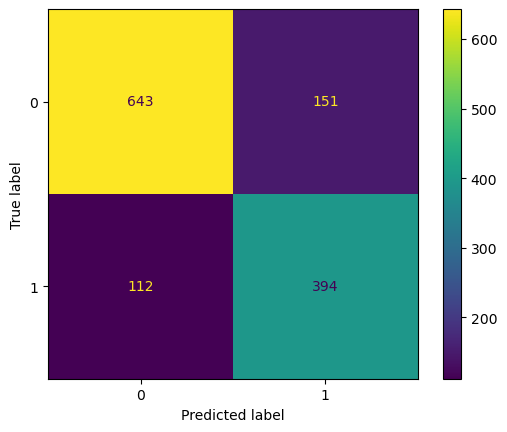

In [285]:
model_lr = LogisticRegression(penalty='l2', random_state=42)

parameters_lr = {
    'classifier__C': [0.001, 0.01, 0.1, 1],  # inverso de la regularización L2 (menor C = más regularización)
    'classifier__class_weight': [None, 'balanced']  # ajusta el peso de las clases para tratar desbalance
}

lr = model_trial(model_lr, parameters_lr)


---

## **Random Forest**

Mejores parámetros: {'selector__k': 30, 'sampler': 'passthrough', 'classifier__n_estimators': 150, 'classifier__max_leaf_nodes': 8, 'classifier__max_depth': 7, 'classifier__class_weight': None}
AUC-ROC Train: 0.7409943575360266 and AUC-ROC Test: 0.7304785894206549
F1-Score Train: 0.6578782172002511 and F1-Score Test: 0.640506329113924
Precision Train: 0.903448275862069 and Precision Test: 0.8908450704225352
Recall-Score Train: 0.5172754195459033 and Recall-Score Test: 0.5


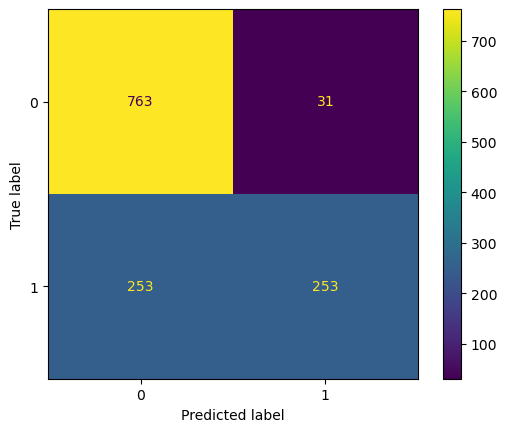

In [286]:
model_rf = RandomForestClassifier(random_state=42)

parameters_rf = {
    'classifier__n_estimators': [100, 150, 200, 250, 300],  # cantidad de árboles
    'classifier__max_depth': [3, 4, 5, 6, 7, 8],  # profundidad máxima de cada árbol (más profundo = más complejo)
    'classifier__max_leaf_nodes': [4, 6, 8, 10, 12, 14, 16, 18, 20],  # máximo número de nodos internos (controla el tamaño del árbol)
    'classifier__class_weight': [None, 'balanced']  # ajusta el peso de las clases para manejar desbalance
}

rf = model_trial(model_rf, parameters_rf)


---

## **XGBoost**


Mejores parámetros: {'selector__k': 30, 'sampler': 'passthrough', 'classifier__subsample': 0.6, 'classifier__scale_pos_weight': 2, 'classifier__reg_lambda': 2, 'classifier__reg_alpha': 0.5, 'classifier__n_estimators': 200, 'classifier__min_child_weight': 5, 'classifier__max_depth': 6, 'classifier__learning_rate': 0.05, 'classifier__colsample_bytree': 0.7}
AUC-ROC Train: 0.8616898094152202 and AUC-ROC Test: 0.7853939128443563
F1-Score Train: 0.8271464358915964 and F1-Score Test: 0.741733690795353
Precision Train: 0.7678646934460888 and Precision Test: 0.6769983686786297
Recall-Score Train: 0.8963474827245804 and Recall-Score Test: 0.8201581027667985


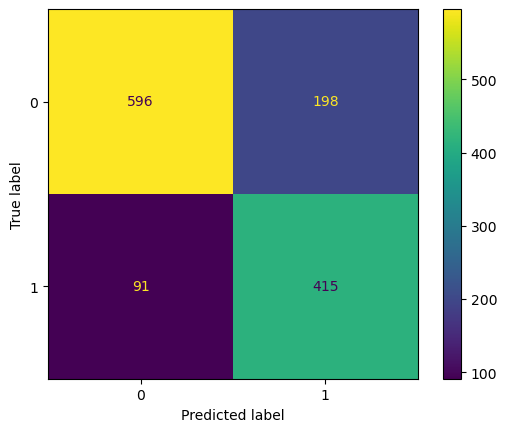

In [287]:
model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

parameters_xgb = {
    'classifier__n_estimators': [100, 150, 200, 250, 300],  # divisiones del modelo XGB
    'classifier__learning_rate': [0.01, 0.05, 0.1],  # mínimo information gain por división
    'classifier__max_depth': [3, 4, 5, 6, 7],  # reducir la profundidad
    'classifier__min_child_weight': [4, 5, 6, 7],  # mayor peso = menos división
    'classifier__subsample': [0.6, 0.7, 0.8],  # igual, introduce aleatoriedad
    'classifier__colsample_bytree': [0.6, 0.7, 0.8],  # también baja un poco la complejidad
    'classifier__reg_alpha': [0.1, 0.5, 1],  # regularización L1
    'classifier__reg_lambda': [1, 2, 3],  # regularización L2
    'classifier__scale_pos_weight': [1, 1.5, 2]  # balanceo de clases para regresión logística
}

xgb = model_trial(model_xgb, parameters_xgb)

---

## **LightGBM**


[LightGBM] [Info] Number of positive: 1620, number of negative: 2540
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000620 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 548
[LightGBM] [Info] Number of data points in the train set: 4160, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.389423 -> initscore=-0.449738
[LightGBM] [Info] Start training from score -0.449738
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

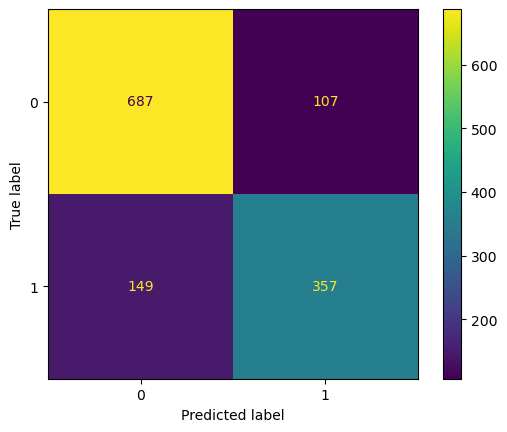

In [288]:
model_lgbm = LGBMClassifier(random_state=42)

parameters_lgbm = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [2, 3, 4, 5, 6],  # menos profundidad para evitar árboles muy especializados
    'classifier__learning_rate': [0.01, 0.05],  # más bajo = menos riesgo de overfit, pero más lento
    'classifier__num_leaves': [15, 31, 50],  # menos hojas = árboles menos complejos
    'classifier__min_child_samples': [20, 40, 60],  # aumentar mínimo para evitar divisiones por ruido
    'classifier__subsample': [0.6, 0.7, 0.8],  # igual, introduce aleatoriedad
    'classifier__colsample_bytree': [0.6, 0.7],  # también baja un poco la complejidad
    'classifier__scale_pos_weight': [1, 2, 3, 5],  # probá esto para clases desbalanceadas
    'classifier__reg_alpha': [0.0, 0.1, 0.5],  # regularización L1
    'classifier__reg_lambda': [0.0, 0.1, 0.5, 1.0]  # regularización L2
}

lgbm = model_trial(model_lgbm, parameters_lgbm)

---

## **Cat Boosting**


Mejores parámetros: {'selector__k': 30, 'sampler': RandomOverSampler(), 'classifier__scale_pos_weight': 1, 'classifier__learning_rate': 0.05, 'classifier__l2_leaf_reg': 5, 'classifier__iterations': 100, 'classifier__depth': 4}
AUC-ROC Train: 0.8051219465163337 and AUC-ROC Test: 0.7981924712019992
F1-Score Train: 0.7626552053486151 and F1-Score Test: 0.7545023696682465
Precision Train: 0.7386679000925069 and Precision Test: 0.7249544626593807
Recall-Score Train: 0.7882527147087858 and Recall-Score Test: 0.7865612648221344


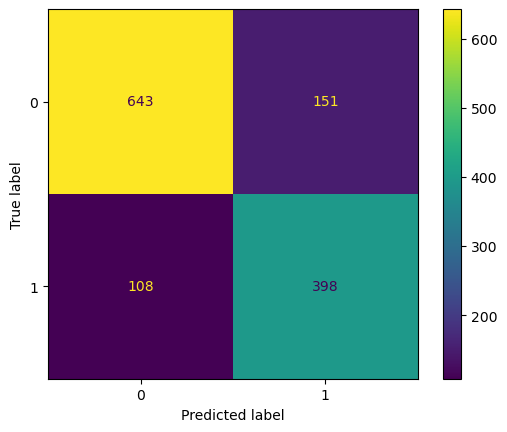

In [289]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(verbose=0, random_state=42)

parameters = {
    'classifier__iterations': [100, 200, 300, 400, 500],  # número total de árboles (iteraciones del boosting)
    'classifier__depth': [3, 4, 5, 6, 7],  # profundidad máxima de cada árbol
    'classifier__learning_rate': [0.01, 0.05, 0.1],  # tasa de aprendizaje (más baja = entrenamiento más lento pero estable)
    'classifier__l2_leaf_reg': [3, 5, 7],  # regularización L2 para evitar overfitting
    'classifier__scale_pos_weight': [1, 5, 10]  # peso aplicado a la clase positiva para tratar desbalance
}

cb = model_trial(model, parameters)


---

In [290]:
def crear_tabla_resultados(lr, rf, xgb, lgbm, cb, scoring='precision'):

    df_funciones = pd.DataFrame()
    df_funciones["metodo"] = ["Regresión Logística", "Random Forest", "XGB", "LGBM", "CatBoost"]

    df_funciones["best_model"] = [lr[4], rf[4], xgb[4], lgbm[4], cb[4]]
    df_funciones["best_params"] = [lr[9], rf[9], xgb[9], lgbm[9], cb[9]]

    df_funciones["precision_train"] = [lr[8], rf[8], xgb[8], lgbm[8], cb[8]]
    df_funciones["precision"] = [lr[3], rf[3], xgb[3], lgbm[3], cb[3]]

    df_funciones["recall_train"] = [lr[5], rf[5], xgb[5], lgbm[5], cb[5]]
    df_funciones["recall"] = [lr[0], rf[0], xgb[0], lgbm[0], cb[0]]

    df_funciones["f1_train"] = [lr[7], rf[7], xgb[7], lgbm[7], cb[7]]
    df_funciones["f1"] = [lr[2], rf[2], xgb[2], lgbm[2], cb[2]]

    df_funciones["auc_roc_train"] = [lr[6], rf[6], xgb[6], lgbm[6], cb[6]]
    df_funciones["auc_roc"] = [lr[1], rf[1], xgb[1], lgbm[1], cb[1]]

    df_funciones = df_funciones.sort_values(by=scoring, ascending=False)

    return df_funciones

In [291]:
tabla = crear_tabla_resultados(lr, rf, xgb, lgbm, cb, scoring='precision')
display(tabla)

,metodo,best_model,best_params,precision_train,precision,recall_train,recall,f1_train,f1,auc_roc_train,auc_roc
1,Random Forest,"(passthrough, SimpleImputer(strategy='median')...","{'selector__k': 30, 'sampler': 'passthrough', ...",0.903448,0.890845,0.517275,0.500000,0.657878,0.640506,0.740994,0.730479
3,LGBM,"(passthrough, SimpleImputer(strategy='median')...","{'selector__k': 35, 'sampler': 'passthrough', ...",0.861322,0.769397,0.784798,0.705534,0.821281,0.736082,0.852071,0.785386
4,CatBoost,"(RandomOverSampler(), SimpleImputer(strategy='...","{'selector__k': 30, 'sampler': RandomOverSampl...",0.738668,0.724954,0.788253,0.786561,0.762655,0.754502,0.805122,0.798192
0,Regresión Logística,"(passthrough, SimpleImputer(strategy='median')...","{'selector__k': 25, 'sampler': 'passthrough', ...",0.741461,0.722936,0.771471,0.778656,0.756168,0.749762,0.799882,0.794240
2,XGB,"(passthrough, SimpleImputer(strategy='median')...","{'selector__k': 30, 'sampler': 'passthrough', ...",0.767865,0.676998,0.896347,0.820158,0.827146,0.741734,0.861690,0.785394


In [292]:
def plot_roc_curves(lr, rf, xgb, lgbm, cb, X_test, y_test):

    modelos = {
        "Logistic Regression": lr[4],
        "Random Forest": rf[4],
        "XGBoost": xgb[4],
        "LightGBM": lgbm[4],
        "CatBoost": cb[4]
    }

    plt.figure(figsize=(9, 6))

    for nombre, modelo in modelos.items():
        # Probabilidades de clase positiva
        y_proba = modelo.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, label=f"{nombre} (AUC = {roc_auc:.2f})")

    # Línea de referencia (modelo aleatorio)
    plt.plot([0, 1], [0, 1], 'k--', lw=1)

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Curvas ROC comparativas')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

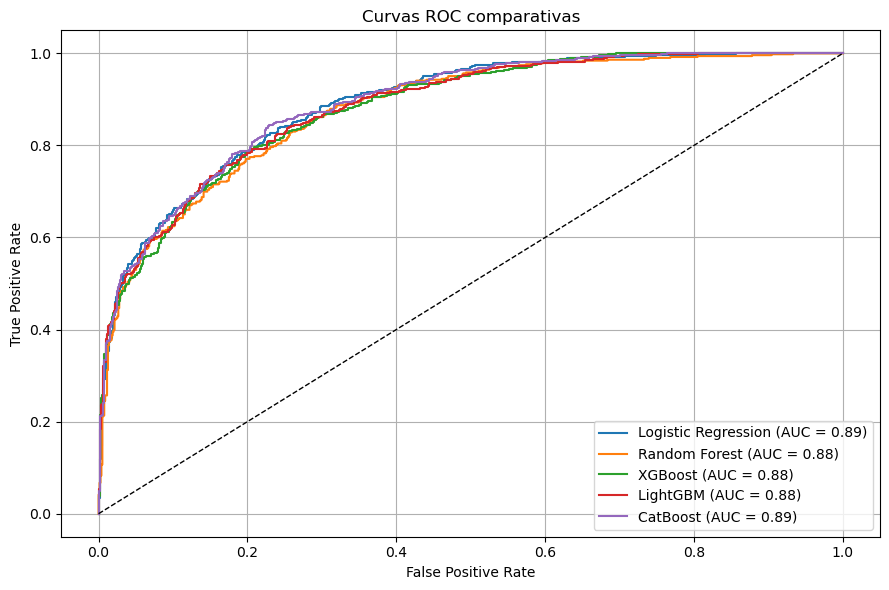

In [293]:
plot_roc_curves(lr, rf, xgb, lgbm, cb, X_test, y_test)

## 📊 Conclusiones del Desempeño de Modelos de Clasificación (en base a Precisión)

Dado que el objetivo es **mostrar campañas exitosas en el homepage y evitar destacar campañas que fracasen**, la métrica más relevante es la **precisión**: de las campañas que el modelo predice como exitosas, ¿cuántas realmente lo son?

| Modelo                 | Precision | Recall | F1-score | AUC-ROC |
|------------------------|-----------|--------|----------|---------|
| **Random Forest**      | **0.8908** | 0.5000 | 0.6405   | 0.7305  |
| **LightGBM**           | 0.7694    | 0.7055 | 0.7361   | 0.7854  |
| **CatBoost**           | 0.7250    | 0.7866 | 0.7545   | 0.7982  |
| **Regresión Logística**| 0.7229    | 0.7787 | 0.7498   | 0.7942  |
| **XGBoost**            | 0.6770    | **0.8202** | 0.7417 | 0.7854  |

---

### ✅ Observaciones clave

- **Random Forest** obtiene la **mayor precisión (0.89)**, lo que significa que, cuando predice que una campaña será exitosa, **acierta con altísima probabilidad**. Este comportamiento es ideal para el objetivo planteado: **evitar mostrar campañas que luego fracasen**.

- A pesar de que **XGBoost** tiene el mejor **recall (0.82)**, su precisión es considerablemente menor, lo cual **no se alinea con el objetivo de negocio**, ya que podría destacar campañas fallidas.

- **LightGBM**, **CatBoost** y **Regresión Logística** ofrecen un buen equilibrio entre precisión y recall, pero están por debajo del rendimiento de Random Forest en la métrica clave.

---

### 🧠 Conclusión final

Dado el objetivo del negocio —**maximizar la tasa de campañas exitosas en el homepage y evitar destacar campañas fallidas**—, el modelo **Random Forest** es la opción más adecuada:

- ✅ **Alta precisión (0.89)** → minimiza el riesgo de mostrar campañas no exitosas.
- ⚠️ Su `recall` es bajo, por lo que puede omitir algunas campañas buenas, pero eso está **alineado con el criterio estratégico del negocio**.

> En este escenario, es preferible **no mostrar campañas dudosas** aunque implique perder algunas buenas, antes que **destacar campañas que probablemente fracasen**.
